# PCA

In [55]:
library(dplyr)
library(ggplot2)
library(ggimage)
library(magick)

df = read.csv("data/pokemon_merged.csv")
num_cols = c('Generation','HP','Attack','Defense','Sp..Atk', 'Sp..Def','height','weight','Speed','stamina')
cat_cols = c('Type.1','Type.2','pokemon_family','wild_avail','egg_avail','raid_avail','category','region')
bool_cols = c('Legendary','shiny','shadow')

# "Yes (available forms listed below)" is treated as TRUE
df[,bool_cols[2:3]] = lapply(df[,bool_cols[2:3]], function(x) ifelse(x == 'No', FALSE, TRUE))
df[,bool_cols] = df[,bool_cols] %>% mutate_all(as.logical) 

df[,cat_cols] = df[,cat_cols] %>% mutate_all(as.factor) 

# drop units
df$height = as.numeric(gsub(" (.*)$", "", df$height))
df$weight = as.numeric(gsub(" (.*)$", "", df$weight))

df %>% select('Name', all_of(num_cols), all_of(cat_cols), all_of(bool_cols)) %>% head

,Name,Generation,HP,Attack,Defense,Sp..Atk,Sp..Def,height,weight,Speed,⋯,Type.2,pokemon_family,wild_avail,egg_avail,raid_avail,category,region,Legendary,shiny,shadow
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>,<lgl>,<lgl>
1,Bulbasaur,1,45,49,49,65,65,0.7,6.9,45,⋯,Poison,Bulbasaur family,Yes,No,Formerly (1st tier level),Seed,Kanto,FALSE,TRUE,TRUE
2,Ivysaur,1,60,62,63,80,80,1.0,13.0,60,⋯,Poison,Bulbasaur family,Yes,No,Formerly (1st tier level),Seed,Kanto,FALSE,TRUE,TRUE
3,Venusaur,1,80,82,83,100,100,2.0,100.0,80,⋯,Poison,Bulbasaur family,Yes,No,Formerly (3rd tier level),Seed,Kanto,FALSE,TRUE,TRUE
4,Charmander,1,39,52,43,60,50,0.6,8.5,65,⋯,,Charmander family,Yes,No,Formerly (1st tier level),Lizard,Kanto,FALSE,TRUE,TRUE
5,Charmeleon,1,58,64,58,80,65,1.1,19.0,80,⋯,,Charmander family,Yes,No,Formerly (2nd tier level),Flame,Kanto,FALSE,TRUE,TRUE
6,Charizard,1,78,84,78,109,85,1.7,90.5,100,⋯,Flying,Charmander family,Yes,No,Formerly (3rd tier level),Flame,Kanto,FALSE,TRUE,TRUE


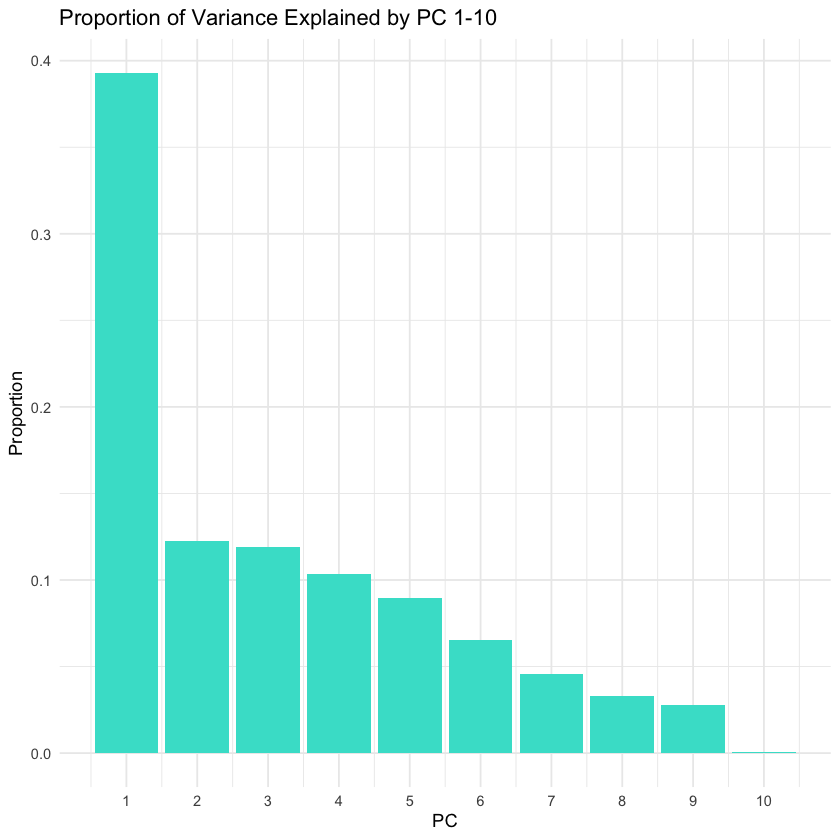

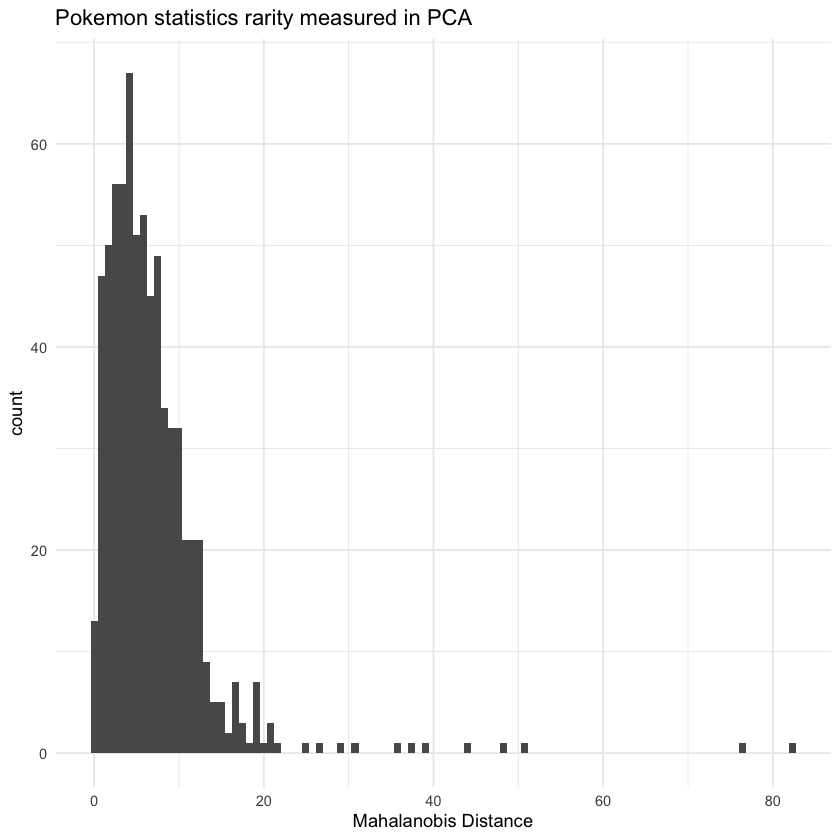

In [2]:
pca = prcomp(df[,num_cols], center = TRUE, scale = TRUE)
var_explained = pca$sdev ^ 2 / sum(pca$sdev ^ 2)
var_explained_df = data.frame(PC = 1:length(var_explained),
                              Variance_Explained = var_explained)
distances = mahalanobis(pca$x[,1:4], center = TRUE, cov = cov(pca$x[,1:4]), newdata = df[,num_cols])

ggplot(var_explained_df, aes(x = PC, y = Variance_Explained)) +
  geom_bar(stat = "identity", fill = "turquoise") +
  labs(title = "Proportion of Variance Explained by PC 1-10",
       x = "PC", y = "Proportion") +
  scale_x_continuous(breaks = seq(1, 10, 1)) +
  theme_minimal()
ggsave("figures/PCA_variance.png", width = 10, height = 5, units = "in")

ggplot(data.frame(distances), aes(x=distances)) + geom_histogram(bins = 100) + 
  labs(title = "Pokemon statistics rarity measured in PCA", x = "Mahalanobis Distance") +
  theme_minimal()
ggsave("figures/PCA_Mahalanobis.png", width = 10, height = 5, units = "in")

# top 1% outliers
outliers = which(distances > quantile(distances, 0.99))

In [3]:
df[outliers,c('Name', 'pic_url')]

,Name,pic_url
,<chr>,<chr>
113,Chansey,https://static.wikia.nocookie.net/pokemongo/images/2/2b/Chansey.png
202,Wobbuffet,https://static.wikia.nocookie.net/pokemongo/images/c/cf/Wobbuffet.png
208,Steelix,https://static.wikia.nocookie.net/pokemongo/images/2/2a/Steelix.png
213,Shuckle,https://static.wikia.nocookie.net/pokemongo/images/3/3c/Shuckle.png
242,Blissey,https://static.wikia.nocookie.net/pokemongo/images/2/2a/Blissey.png
320,Wailord,https://static.wikia.nocookie.net/pokemongo/images/8/89/Wailord.png
382,Groudon,https://static.wikia.nocookie.net/pokemongo/images/d/d5/Groudon.png
698,Avalugg,https://static.wikia.nocookie.net/pokemongo/images/9/93/Avalugg.png


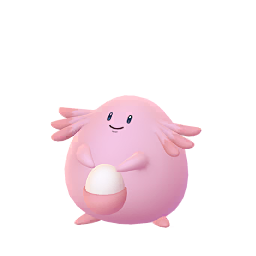

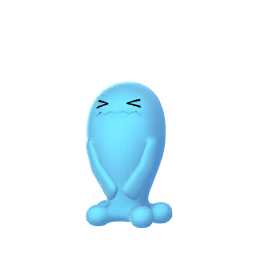

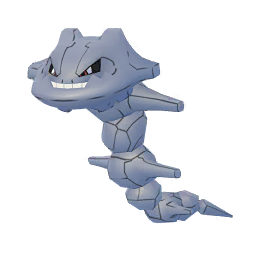

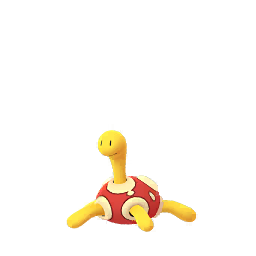

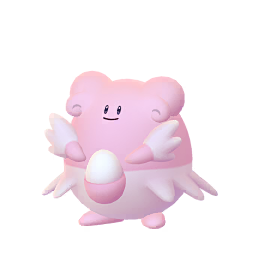

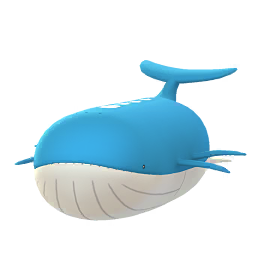

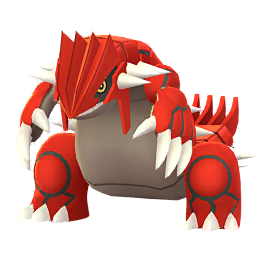

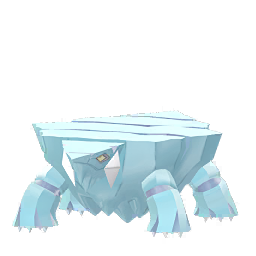

# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      256    256 sRGB       TRUE     28226 +37x+37
# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      256    256 sRGB       TRUE     22910 +37x+37
# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      256    256 sRGB       TRUE     35466 +37x+37
# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      256    256 sRGB       TRUE     15929 +37x+37
# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      256    256 sRGB       TRUE     35023 +37x+37
# A tibble: 1 × 7
  format width height colorspace matte filesize dens

In [4]:
# display each's image
for (i in outliers) {
    img = image_read(df[i,'pic_url'])
    print(img)
    image_write(image_trim(img), paste('figures/pca/', df[i,'Name'], '.png', sep = ''))
}

In [5]:
avg_pixels = 10000
img_size_factor = function(x){
    return(sum(as.integer(x[[1]])[,,4] > 0)/avg_pixels)
}

for (i in 1:10){
    img = df[i,'pic_url'] %>% image_read()
    new_dim = image_info(img)$height * sqrt(1/img_size_factor(img))
    img = img %>% image_resize(new_dim)
    #print(img)
}

In [6]:
demo_df = df %>% filter(Generation == 1) %>% select('Name', 'weight', 'height', 'pic_url')
demo_df %>% head

,Name,weight,height,pic_url
,<chr>,<dbl>,<dbl>,<chr>
1,Bulbasaur,6.9,0.7,https://static.wikia.nocookie.net/pokemongo/images/4/43/Bulbasaur.png
2,Ivysaur,13.0,1.0,https://static.wikia.nocookie.net/pokemongo/images/8/86/Ivysaur.png
3,Venusaur,100.0,2.0,https://static.wikia.nocookie.net/pokemongo/images/b/be/Venusaur.png
4,Charmander,8.5,0.6,https://static.wikia.nocookie.net/pokemongo/images/5/56/Charmander.png
5,Charmeleon,19.0,1.1,https://static.wikia.nocookie.net/pokemongo/images/f/fb/Charmeleon.png
6,Charizard,90.5,1.7,https://static.wikia.nocookie.net/pokemongo/images/9/95/Charizard.png


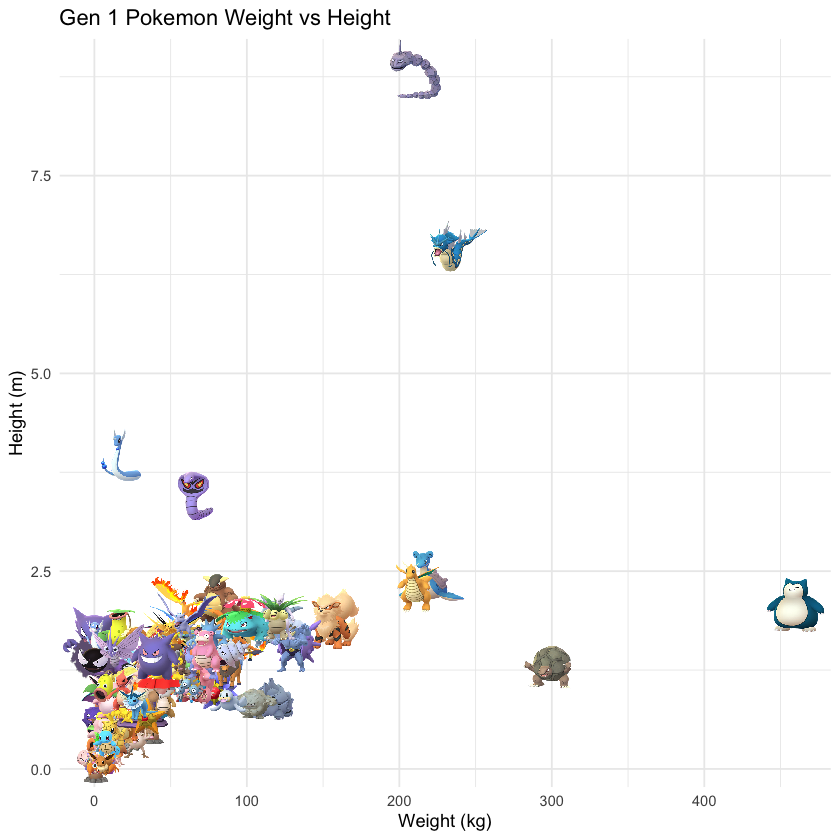

Saving 7 x 7 in image


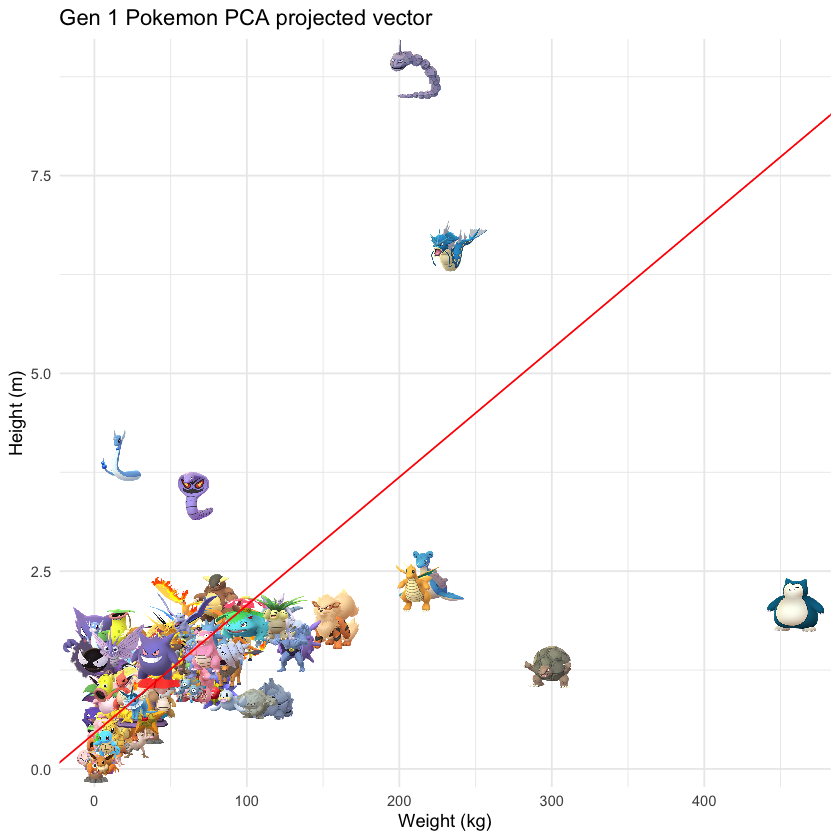

Saving 7 x 7 in image


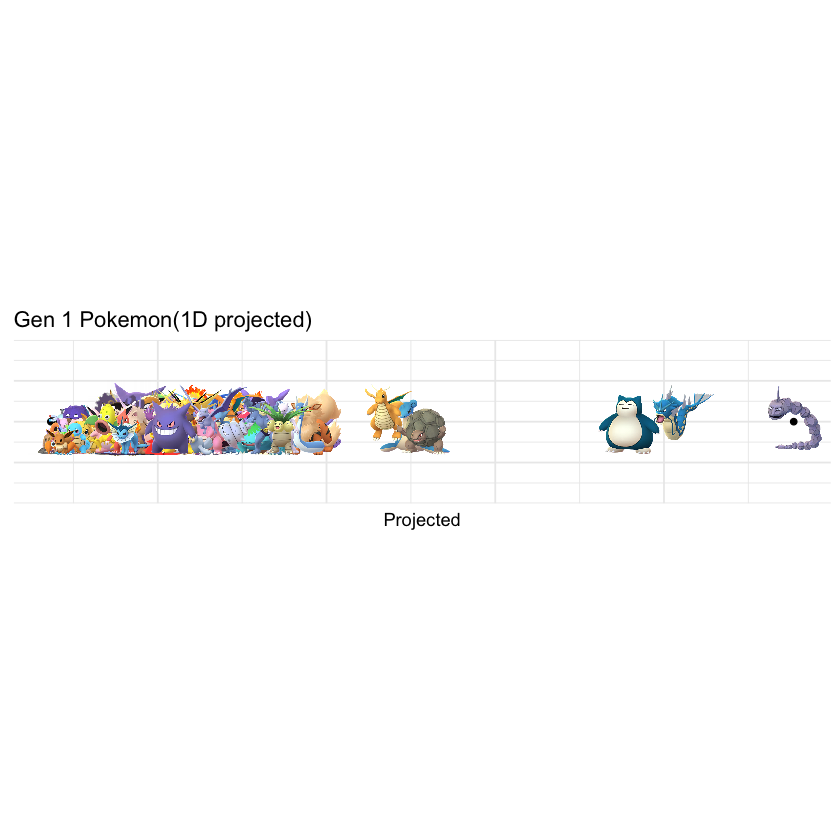

In [7]:
ggplot(demo_df, aes(x = weight, y = height, image = pic_url)) +
  geom_image(size = 0.1) +
  #geom_text(aes(label = Name), size = 3, vjust = 1.5) +
  labs(title = "Gen 1 Pokemon Weight vs Height",
       x = "Weight (kg)", y = "Height (m)") +
  theme_minimal()

ggsave("figures/PCA_demo.png", width = 10, height = 10, units = "in")

demo_pca = prcomp(demo_df[,c('weight', 'height')], center = TRUE, scale = TRUE)
demo_df$PC1 = demo_pca$x[,1]

slope = (sd(demo_df$height)*demo_pca$rotation[2, 1]) / (sd(demo_df$weight)*demo_pca$rotation[1, 1])
intercept = mean(demo_df$height) - slope*mean(demo_df$weight)
max_weight = max(demo_df$weight)

ggplot(demo_df, aes(x = weight, y = height, image = pic_url)) +
  geom_image(size = 0.1) +
  geom_abline(intercept = intercept, slope = slope, color = "red") +
  labs(title = "Gen 1 Pokemon PCA projected vector",
       x = "Weight (kg)", y = "Height (m)") +  
  theme_minimal()
ggsave("figures/PCA_demo_pc.png")

ggplot(demo_df, aes(x=PC1, y=0, image = pic_url)) +
  geom_point() +
  geom_image(size = 0.5, by="height", asp=5) +
  labs(title = "Gen 1 Pokemon(1D projected)",
       x = "Projected", y = "") +
  theme_minimal() +
  theme(axis.text = element_blank(),
        axis.ticks = element_blank(),
        axis.title.y = element_blank(),
        axis.line = element_blank(),
        legend.position = "none",
        aspect.ratio = 0.2)


ggsave("figures/PCA_demo_projected.png")

Saving 7 x 7 in image


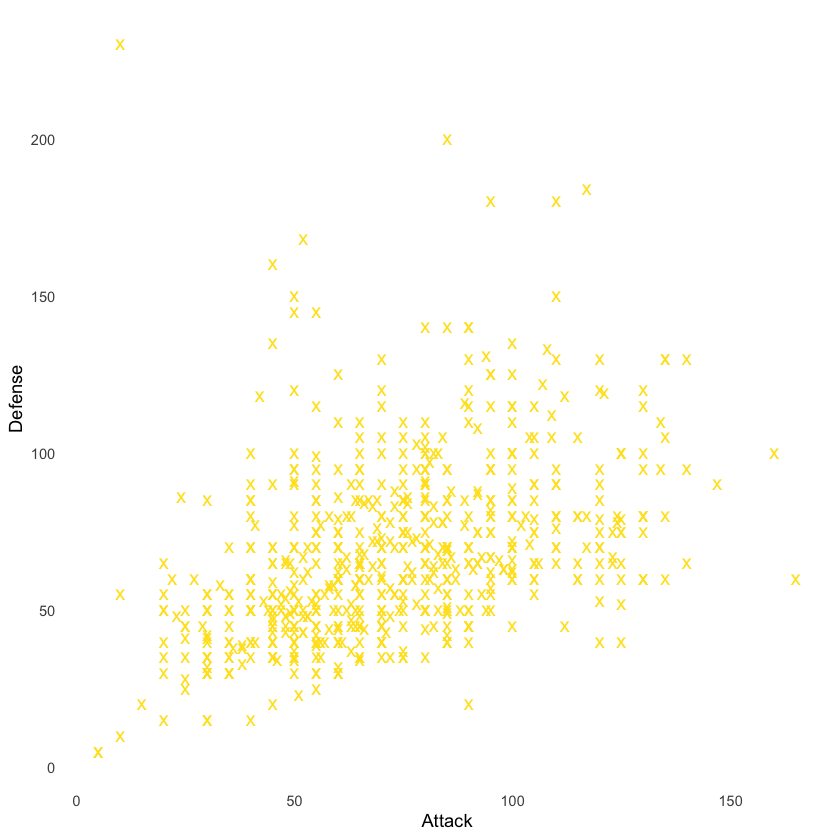

In [76]:
non_legendary_pokemon <- df[df$Legendary == FALSE,]
ggplot(non_legendary_pokemon, aes(x = Attack, y = Defense, color = Legendary, shape = Legendary)) +
  geom_point(size = 4) +
  scale_color_manual(values = c("#FFE221")) +
  scale_shape_manual(values = c("x")) +
  theme_minimal() +
  labs(x = "Attack", y = "Defense") +
  guides(color = FALSE, shape = FALSE) +
  theme(axis.line = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())

ggsave("figures/EDA_1.png")

Saving 7 x 7 in image


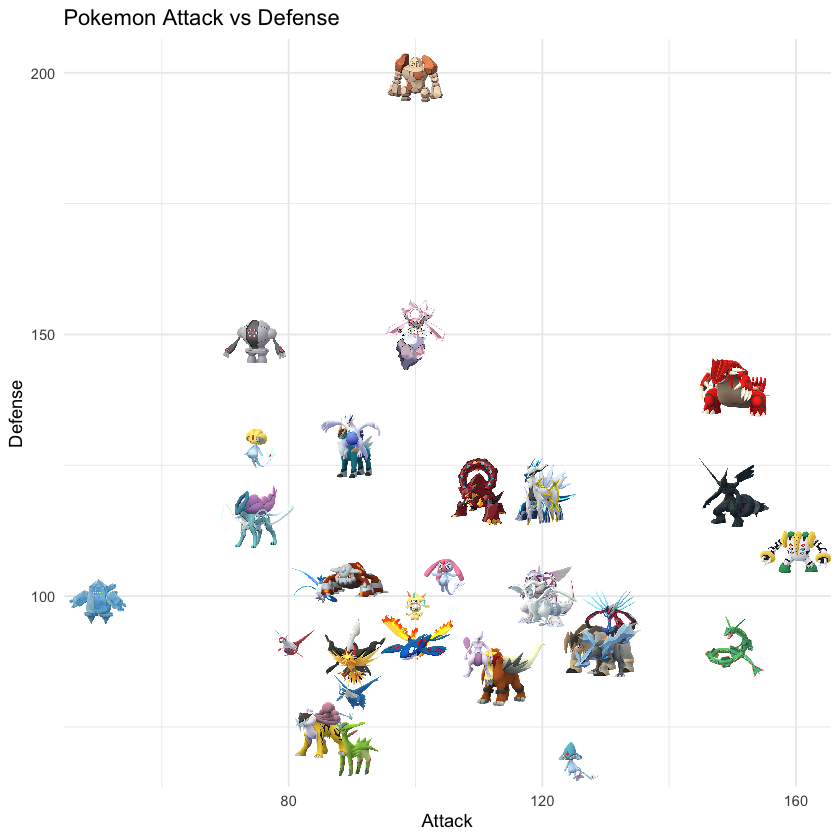

In [74]:
legendary_df = df %>% filter(Legendary == 1)

ggplot(legendary_df, aes(x = Attack, y = Defense, image = pic_url, shape = Legendary)) +
geom_image(size = 0.1) +
xlim(0, 180) + ylim(0, 230)

labs(title = "Pokemon Attack vs Defense",
     x = "Attack", y = "Defense") + theme_minimal()

ggsave("figures/EDA_2.png")
